# CIFAR10 Image Classification using 2D CNN

In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout

In [2]:
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [4]:
from tensorflow.keras.datasets import cifar10

In [5]:
(x_train,y_train),(x_test, y_test) = cifar10.load_data()

In [6]:
classes_name=['airplane', 'automobile', 'bird','cat','deer','dog','frog','horse','skip','truck']

In [7]:
x_train.max()

255

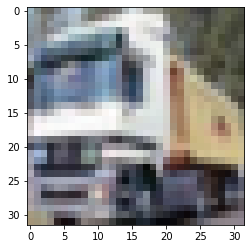

In [8]:
plt.imshow(x_train[1])

In [9]:
x_train=x_train/255.0
x_test=x_test/255.0

In [10]:
(x_train.shape, x_test.shape)

((50000, 32, 32, 3), (10000, 32, 32, 3))

## Build CNN Model

In [11]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3), padding='same',activation='relu',input_shape=[32,32,3]))

model.add(Conv2D(filters=64,kernel_size=(3,3), padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Dropout(0.5))

model.add(Conv2D(filters=128,kernel_size=(3,3), padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10,activation='softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 128)         0

In [13]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

In [14]:
history=model.fit(x_train, y_train, batch_size=10, epochs=10, verbose=1, validation_data=(x_test,y_test))

Epoch 1/10
5000/5000 [==============================] - 17s 3ms/step - loss: 1.4910 - sparse_categorical_accuracy: 0.4600 - val_loss: 1.1639 - val_sparse_categorical_accuracy: 0.5901
Epoch 2/10
5000/5000 [==============================] - 17s 3ms/step - loss: 1.1233 - sparse_categorical_accuracy: 0.6023 - val_loss: 1.0084 - val_sparse_categorical_accuracy: 0.6587
Epoch 3/10
5000/5000 [==============================] - 17s 3ms/step - loss: 1.0053 - sparse_categorical_accuracy: 0.6451 - val_loss: 0.9196 - val_sparse_categorical_accuracy: 0.6904
Epoch 4/10
5000/5000 [==============================] - 17s 3ms/step - loss: 0.9411 - sparse_categorical_accuracy: 0.6676 - val_loss: 0.9167 - val_sparse_categorical_accuracy: 0.6854
Epoch 5/10
5000/5000 [==============================] - 17s 3ms/step - loss: 0.8905 - sparse_categorical_accuracy: 0.6864 - val_loss: 0.8884 - val_sparse_categorical_accuracy: 0.6900
Epoch 6/10
5000/5000 [==============================] - 17s 3ms/step - loss: 0.8512 -

## Evaluation and visualization

In [15]:
def plot_learningCurve(history, epoch):
    # plot training & validation accuracy values
    epoch_range = range(1, epoch+1)
    plt.plot(epoch_range, history.history['sparse_categorical_accuracy'])
    plt.plot(epoch_range, history.history['val_sparse_categorical_accuracy'])
    plt.title('Model_accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train','val'],loc='upper left')
    plt.show()
    
    # Plot traning & validation loss values
    
    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train','val'],loc='upper left')
    plt.show()

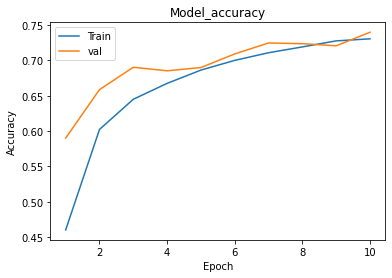

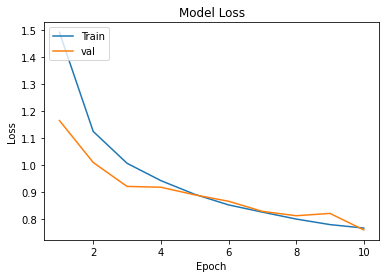

In [16]:
plot_learningCurve(history, 10)

In [17]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [18]:
y_pred = model.predict_classes(x_test)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([3, 8, 8, ..., 5, 4, 7])

In [19]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [20]:
mat=confusion_matrix(y_test,y_pred)
mat

array([[831,  13,  25,  15,  15,   3,   9,   4,  50,  35],
       [  9, 852,   4,   5,   4,   2,  13,   1,  30,  80],
       [ 88,   1, 536,  44, 139,  64,  98,  10,  13,   7],
       [ 37,   7,  64, 535,  67, 134,  97,  14,  22,  23],
       [ 21,   1,  28,  60, 777,  11,  59,  29,  10,   4],
       [ 17,   4,  32, 201,  59, 585,  54,  23,  14,  11],
       [ 11,   2,  17,  32,  51,   7, 870,   3,   6,   1],
       [ 16,   2,  42,  48, 112,  51,  12, 695,   8,  14],
       [ 58,  13,   6,   9,  13,   2,   5,   4, 872,  18],
       [ 26,  57,   8,  11,   7,   3,   7,   5,  29, 847]])

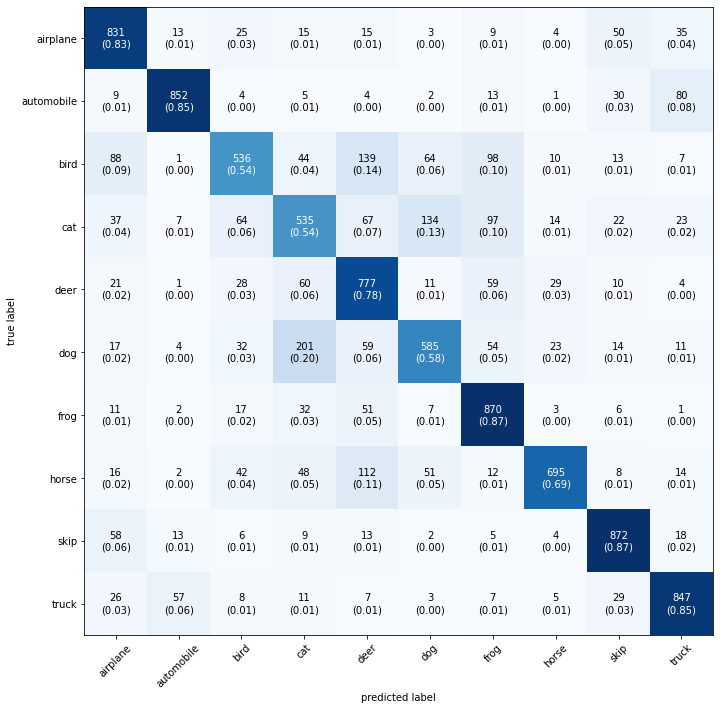

In [21]:
fig, ax = plot_confusion_matrix(conf_mat=mat, figsize=(10,10),class_names=classes_name, show_normed=True)
plt.tight_layout()
fig.savefig('cm.png')